In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderUnavailable


# Abrindo o df

In [42]:
df = pd.read_csv('D:\pasta_sem_titulo\df_filtrado_atvivas\df_filtrado.csv', sep = ';')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16864\3161529576.py:1: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv('D:\pasta_sem_titulo\df_filtrado_atvivas\df_filtrado.csv', sep = ';')


# Tirando as duplicadas baseadas no cnpj 

In [43]:
df_sem_duplicatas = df.drop_duplicates(subset=['CNPJ BÁSICO'])

In [44]:
df_sem_duplicatas['CNPJ BÁSICO'].value_counts()

CNPJ BÁSICO
72074933    1
3840974     1
2150858     1
1272240     1
5500399     1
           ..
4732675     1
1342862     1
61053070    1
7824973     1
53884195    1
Name: count, Length: 84031, dtype: int64

# A porcentagem acumulada[nome fantasia] <= 0.6

In [45]:
df_cnai_nomes = df_sem_duplicatas[['CNAE FISCAL PRINCIPAL', 'NOME FANTASIA', 'CNPJ BÁSICO']]

In [46]:
df_cnai_nomes['NOME FANTASIA'].isna().value_counts()

NOME FANTASIA
True     56170
False    27861
Name: count, dtype: int64

In [47]:
df_cnai_nomes

,CNAE FISCAL PRINCIPAL,NOME FANTASIA,CNPJ BÁSICO
0,9602501,MULHER CHEIROSA,72074933
1,4761003,LIVRARIA E PAPELARIA DDED,72117641
2,4783101,NaN,72117583
3,9601701,LAVANDERIA RITALI,72140619
4,4781400,NILVA MODAS,72178866
...,...,...,...
85566,7311400,INFLUENTE EVENTOS,53882591
85567,7319002,NaN,53882863
85568,5611201,NaN,53883193
85569,8592999,NaN,53884161


In [48]:
df_cnai_nomes.dropna(inplace=True, subset=['NOME FANTASIA'])

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16864\719011003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cnai_nomes.dropna(inplace=True, subset=['NOME FANTASIA'])


In [49]:
df_cnai_nomes['NOME FANTASIA'].isna().value_counts()

NOME FANTASIA
False    27861
Name: count, dtype: int64

In [50]:
lista_canais2 = list(df_cnai_nomes['CNAE FISCAL PRINCIPAL'].value_counts().to_dict().keys())
lista_quantidades_cnpj2 = list(df_cnai_nomes['CNAE FISCAL PRINCIPAL'].value_counts().to_dict().values())
lista_quantidade_cnpj_porcentagens2 = list(df_cnai_nomes['CNAE FISCAL PRINCIPAL'].value_counts(normalize=True).to_dict().values())

In [51]:
df_cnpj_por_cnais_ruas = pd.DataFrame({'Cnais':lista_canais2, 'Quantidades_Nomes_fantasia':lista_quantidades_cnpj2, 'Porcentagens_nomes_fantasia':lista_quantidade_cnpj_porcentagens2})

In [52]:
df_cnpj_por_cnais_ruas['porcentagens_acumuladas'] = df_cnpj_por_cnais_ruas['Porcentagens_nomes_fantasia'].cumsum()

In [53]:
df_cnpj_por_cnais_ruas

,Cnais,Quantidades_Nomes_fantasia,Porcentagens_nomes_fantasia,porcentagens_acumuladas
0,8211300,978,0.035103,0.035103
1,4781400,893,0.032052,0.067155
2,5611201,779,0.027960,0.095115
3,4120400,678,0.024335,0.119450
4,4712100,597,0.021428,0.140878
...,...,...,...,...
838,4632002,1,0.000036,0.999856
839,1610204,1,0.000036,0.999892
840,725100,1,0.000036,0.999928
841,3091101,1,0.000036,0.999964


In [54]:
df_filtrado_06 = df_cnpj_por_cnais_ruas[df_cnpj_por_cnais_ruas['porcentagens_acumuladas']<=0.6]

In [55]:
df_filtrado_06

,Cnais,Quantidades_Nomes_fantasia,Porcentagens_nomes_fantasia,porcentagens_acumuladas
0,8211300,978,0.035103,0.035103
1,4781400,893,0.032052,0.067155
2,5611201,779,0.027960,0.095115
3,4120400,678,0.024335,0.119450
4,4712100,597,0.021428,0.140878
...,...,...,...,...
59,4755502,118,0.004235,0.582965
60,9511800,115,0.004128,0.587093
61,8650004,114,0.004092,0.591185
62,4541206,108,0.003876,0.595061


In [56]:
df_mesclado = pd.merge(df_filtrado_06, df_cnai_nomes, how = 'inner', left_on = 'Cnais', right_on='CNAE FISCAL PRINCIPAL')

In [57]:
# df_mesclado

,Cnais,Quantidades_Nomes_fantasia,Porcentagens_nomes_fantasia,porcentagens_acumuladas,CNAE FISCAL PRINCIPAL,NOME FANTASIA,CNPJ BÁSICO
0,8211300,978,0.035103,0.035103,8211300,NOVAS TENDENCIAS REPRESENTACOES COMERCIAIS,72473770
1,8211300,978,0.035103,0.035103,8211300,VIRTUAL CARD,7491318
2,8211300,978,0.035103,0.035103,8211300,CAPITANIA SERVICOS,7993106
3,8211300,978,0.035103,0.035103,8211300,CHANGERIE,35225184
4,8211300,978,0.035103,0.035103,8211300,EFICIENCE CONTABILIDADE E ASSESSORIA,3672939
...,...,...,...,...,...,...,...
16682,8513900,108,0.003876,0.598938,8513900,ESCOLA VIVER VALORES - COMECO DO CAMINHO,34701800
16683,8513900,108,0.003876,0.598938,8513900,COLEGIO 21 DE ABRIL,36519786
16684,8513900,108,0.003876,0.598938,8513900,COLEGIO GURI SENIOR,34561913
16685,8513900,108,0.003876,0.598938,8513900,UNIC,44580130


# df[cnpj,nome fantasia, cnai, endereco, lat, lon]

In [58]:
df_final = pd.DataFrame()

In [19]:
df_final = df_mesclado[['CNPJ BÁSICO', 'NOME FANTASIA', 'CNAE FISCAL PRINCIPAL']]

In [59]:
df_mesclado.columns

Index(['Cnais', 'Quantidades_Nomes_fantasia', 'Porcentagens_nomes_fantasia',
       'porcentagens_acumuladas', 'CNAE FISCAL PRINCIPAL', 'NOME FANTASIA',
       'CNPJ BÁSICO'],
      dtype='object')

In [60]:
lista_enderecos_completos = []
for i in range(len(df_mesclado)):
    rua = str(df_mesclado['LOGRADOURO'][i])
    numero = str(df_mesclado['NÚMERO'][i])
    bairro = str(df_mesclado['BAIRRO'][i])
    cep = str(df_mesclado['CEP'][i])
    uf = str(df_mesclado['UF'][i])
    endereco_completo = str(rua+' ,'+numero+' - '+bairro+' ,'+'FORTALEZA'+' - '+uf+ ', '+cep)
    lista_enderecos_completos.append(endereco_completo)

KeyError: 'LOGRADOURO'

In [23]:
df_final['EMDERECO COMPLETO'] = lista_enderecos_completos

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13720\392542961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['EMDERECO COMPLETO'] = lista_enderecos_completos


In [25]:
df_final['EMDERECO COMPLETO'][0]

'GUILHERME ROCHA ,218 - CENTRO ,FORTALEZA - CE, 60030140'

In [26]:
lista = []
for i  in range(len(df_final)):
    lista.append(i)

In [27]:
df_final['ID'] = lista

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13720\3896292336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['ID'] = lista


In [28]:
df_final

,CNPJ BÁSICO,NOME FANTASIA,CNAE FISCAL PRINCIPAL,EMDERECO COMPLETO,ID
0,72473770,NOVAS TENDENCIAS REPRESENTACOES COMERCIAIS,8211300,"GUILHERME ROCHA ,218 - CENTRO ,FORTALEZA - CE,...",0
1,7491318,VIRTUAL CARD,8211300,"JORNALISTA THOMAZ COELHO ,1678 - MESSEJANA ,FO...",1
2,7497856,NaN,8211300,"NOGUEIRA ACIOLI ,996 - CENTRO ,FORTALEZA - CE,...",2
3,6819700,NaN,8211300,"SAO PAULO ,32 - CENTRO ,FORTALEZA - CE, 60030100",3
4,7993106,CAPITANIA SERVICOS,8211300,"TARCISIO BONFIM ,219 - PAPICU ,FORTALEZA - CE,...",4
...,...,...,...,...,...
48615,34701800,ESCOLA VIVER VALORES - COMECO DO CAMINHO,8513900,"ANA BRITO ,913 - MONDUBIM ,FORTALEZA - CE, 607...",48615
48616,36519786,COLEGIO 21 DE ABRIL,8513900,"BEZERRA DE MENEZES ,620 - SAO GERARDO ,FORTALE...",48616
48617,34561913,COLEGIO GURI SENIOR,8513900,"CONEGO DE CASTRO ,1820 - VILA PERY ,FORTALEZA ...",48617
48618,44580130,UNIC,8513900,"COSTA SOUSA ,217 - BENFICA ,FORTALEZA - CE, 60...",48618


In [29]:
df_final.to_csv('D:\AEY HELTH\df_enderecos.csv', sep = ';', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13720\2711078460.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_final.to_csv('D:\AEY HELTH\df_enderecos.csv', sep = ';', index=False)


In [31]:
df_lat_lon = pd.DataFrame(columns=list(df_final.columns))

In [33]:
df_lat_lon.to_csv('D:\AEY HELTH\df_lat_lon.csv', sep = ';', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13720\3559682599.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_lat_lon.to_csv('D:\AEY HELTH\df_lat_lon.csv', sep = ';', index=False)


# Lat Lon

In [26]:
df_final = pd.read_csv('D:\AEY HELTH\dreserva\df_restantes.csv', sep = ';')
df_aleatorio = df_final.sample(n=5000)
lista_latitude = []
lista_longitude = []
geolocator = Nominatim(user_agent="my_geocoder")
none = 0
for endereco in tqdm(df_aleatorio['EMDERECO COMPLETO']):
    try:
        location = geolocator.geocode(endereco)
        if location:
            latitude = location.latitude
            longitude = location.longitude
            lista_latitude.append(latitude)
            lista_longitude.append(longitude)
        else:
            lista_latitude.append(None)
            lista_longitude.append(None)
            none += 1
    except GeocoderUnavailable:
        lista_latitude.append(None)
        lista_longitude.append(None)
        none += 1
print(none) 
df_aleatorio['LAT'] = lista_latitude
df_aleatorio['LON'] = lista_longitude
df_aleatorio = df_aleatorio[df_aleatorio['LAT'].notna()]
df = pd.read_csv('D:\AEY HELTH\dreserva\df_lat_lon.csv', sep = ';')
df = pd.concat([df,df_aleatorio], ignore_index=True)
print(len(df))
df.to_csv('D:\AEY HELTH\dreserva\df_lat_lon.csv', sep = ';')
valores_aleatorio = df_aleatorio['ID'].unique()
valores_final = df_final['ID'].unique()
valores_restantes = list(set(valores_final) - set(valores_aleatorio))
df_final = df_final[df_final['ID'].isin(valores_restantes)]
print(len(df_final))
df_final.to_csv('D:\AEY HELTH\dreserva\df_restantes.csv', sep = ';', index=False)


<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:27: SyntaxWarning: invalid escape sequence '\A'
<>:30: SyntaxWarning: invalid escape sequence '\A'
<>:36: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:27: SyntaxWarning: invalid escape sequence '\A'
<>:30: SyntaxWarning: invalid escape sequence '\A'
<>:36: SyntaxWarning: invalid escape sequence '\A'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16864\745359146.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_final = pd.read_csv('D:\AEY HELTH\dreserva\df_restantes.csv', sep = ';')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16864\745359146.py:27: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv('D:\AEY HELTH\dreserva\df_lat_lon.csv', sep = ';')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16864\745359146.py:30: SyntaxWarning: invalid escape sequence '\A'
  df.to_csv('D:\AEY HELTH\dreserva\df_lat_lon.csv', sep = ';')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel

8525
39720
8900


# Grafico

In [27]:
df_lat_lon = pd.read_csv('D:\AEY HELTH\dreserva\df_lat_lon.csv', sep = ';')

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16864\4175474090.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_lat_lon = pd.read_csv('D:\AEY HELTH\dreserva\df_lat_lon.csv', sep = ';')


In [28]:
Q1 = df_lat_lon['LAT'].quantile(0.25)
Q3 = df_lat_lon['LAT'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sem_outliers = df_lat_lon[(df_lat_lon['LAT'] >= limite_inferior) & (df_lat_lon['LAT'] <= limite_superior)]

(array([4.000e+01, 5.300e+01, 3.800e+01, 5.200e+01, 5.800e+01, 1.000e+02,
        1.080e+02, 1.190e+02, 1.650e+02, 2.030e+02, 2.150e+02, 3.060e+02,
        4.240e+02, 5.260e+02, 4.690e+02, 4.550e+02, 4.030e+02, 4.960e+02,
        5.410e+02, 6.720e+02, 5.850e+02, 6.880e+02, 7.330e+02, 6.460e+02,
        9.140e+02, 8.740e+02, 9.270e+02, 7.720e+02, 7.310e+02, 6.490e+02,
        7.570e+02, 8.390e+02, 7.550e+02, 6.930e+02, 9.380e+02, 9.890e+02,
        9.930e+02, 1.082e+03, 1.216e+03, 1.312e+03, 1.753e+03, 1.974e+03,
        2.553e+03, 2.766e+03, 1.437e+03, 2.278e+03, 1.478e+03, 8.300e+02,
        5.450e+02, 5.400e+02, 3.700e+02, 2.170e+02, 1.330e+02, 1.320e+02,
        5.800e+01, 1.100e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3.8762448 , -3.87296223, -3.86967967, -3.8663971 , -3.86311453,
        -3.85983197, -3.8565494 , -3.85326684, -3.84998427, -3.8467017 ,
        -3.84341914, -3.84013657, -3.836854  , -3.83357144, 

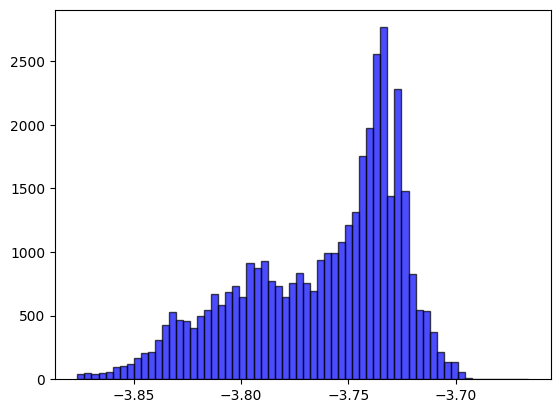

In [29]:
plt.hist(df_sem_outliers['LAT'], bins = 'auto', color='blue', alpha=0.7, edgecolor='black')

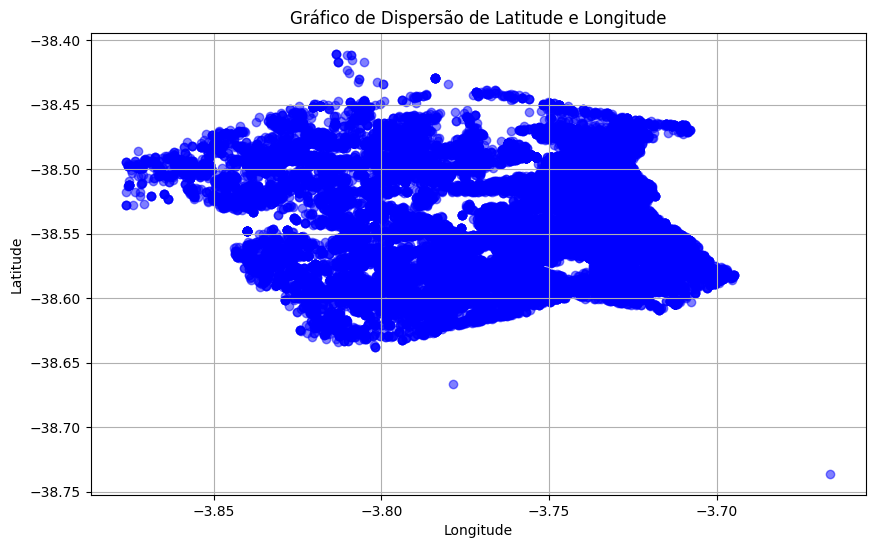

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df_sem_outliers['LAT'], df_sem_outliers['LON'], color='blue', alpha=0.5) 
plt.title('Gráfico de Dispersão de Latitude e Longitude') 
plt.xlabel('Longitude') 
plt.ylabel('Latitude')
plt.grid(True)
plt.show()